<h1>Bike Sharing Data Set</h1>
Predicting Hourly Bike Rentals Using the Full Data Science Lifecycle

In [ ]:
!pip install plotly
!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_cleaned = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_map = {1: 'Clear', 2: 'Mist+Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df_cleaned['season'] = df_cleaned['season'].map(season_map)
df_cleaned['weathersit'] = df_cleaned['weathersit'].map(weather_map)
df_cleaned['weekday'] = df_cleaned['weekday'].map(weekday_map)

missing_values = df_cleaned.isnull().sum()
df_cleaned.head(), missing_values


(   season  yr  mnth  hr  holiday   weekday  workingday weathersit  temp  \
 0  Winter   0     1   0        0  Saturday           0      Clear  0.24   
 1  Winter   0     1   1        0  Saturday           0      Clear  0.22   
 2  Winter   0     1   2        0  Saturday           0      Clear  0.22   
 3  Winter   0     1   3        0  Saturday           0      Clear  0.24   
 4  Winter   0     1   4        0  Saturday           0      Clear  0.24   
 
     atemp   hum  windspeed  cnt  
 0  0.2879  0.81        0.0   16  
 1  0.2727  0.80        0.0   40  
 2  0.2727  0.80        0.0   32  
 3  0.2879  0.75        0.0   13  
 4  0.2879  0.75        0.0    1  ,
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 cnt           0
 dtype: int64)

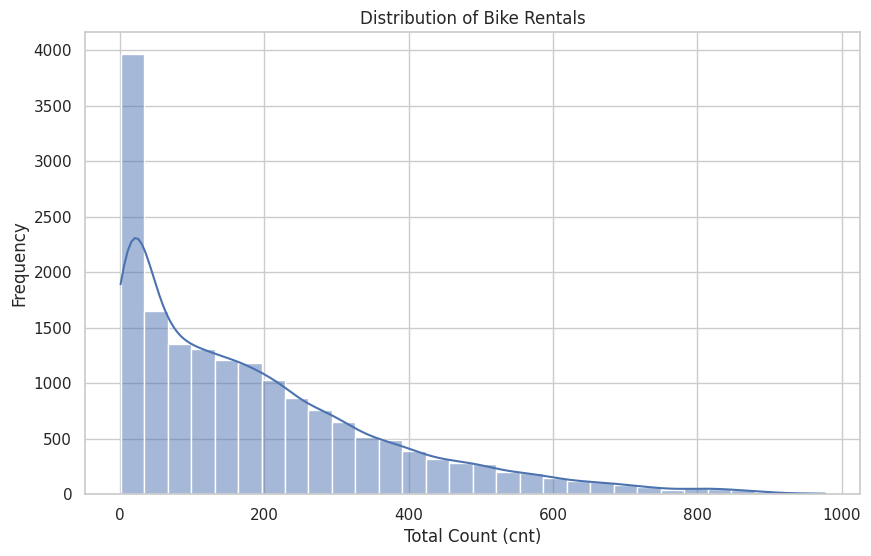

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
sns.histplot(df_cleaned['cnt'], kde=True, bins=30)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Total Count (cnt)')
plt.ylabel('Frequency')
plt.show()

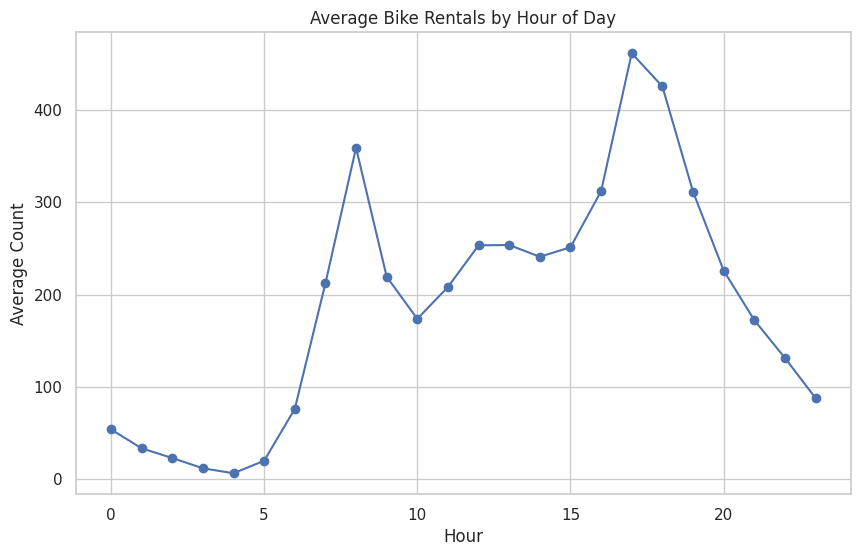

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
avg_hour = df_cleaned.groupby('hr')['cnt'].mean()
avg_hour.plot(kind='line', marker='o')
plt.title('Average Bike Rentals by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.grid(True)
plt.show()

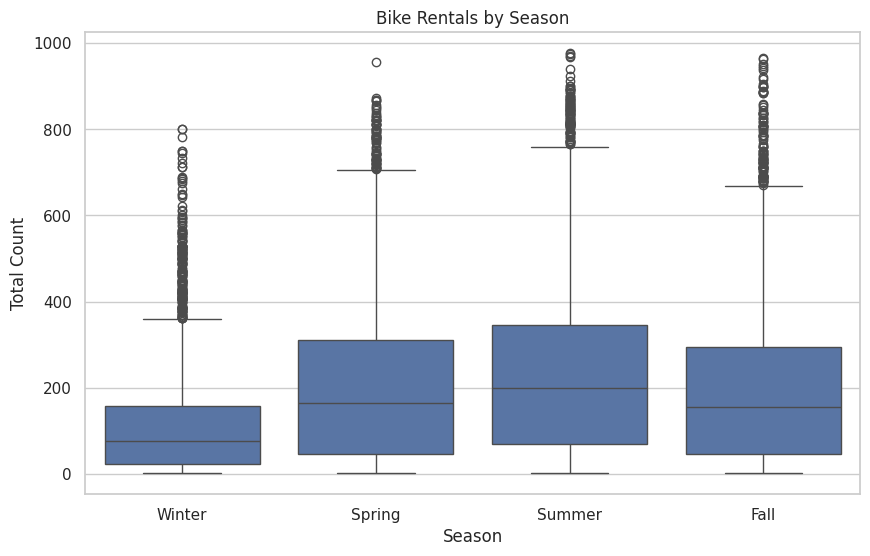

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
sns.boxplot(x='season', y='cnt', data=df_cleaned)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.show()

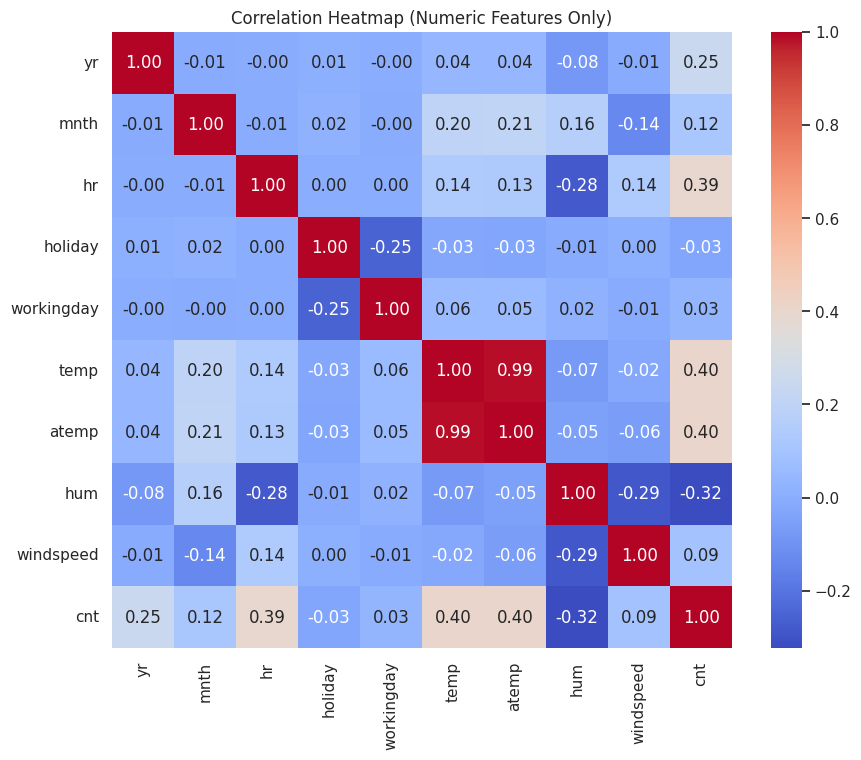

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
numeric_df = df_cleaned.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [ ]:
df_plot = df_cleaned.copy()
df_plot['yr'] = df_plot['yr'].map({0: 2011, 1: 2012})
fig3 = px.scatter(df_plot, x='temp', y='cnt', color='season',
                  title='Temperature vs. Bike Rentals',
                  opacity=0.6, trendline='ols', width=860, height=650)
fig3.show()

In [ ]:
weekday_avg = df_plot.groupby('weekday')['cnt'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg['weekday'] = pd.Categorical(weekday_avg['weekday'], categories=weekday_order, ordered=True)
weekday_avg = weekday_avg.sort_values('weekday')
fig4 = px.bar(weekday_avg, x='weekday', y='cnt', color='weekday',
              title='Average Rentals by Weekday', width=860, height=650)
fig4.show()

In [ ]:
weather_avg = df_plot.groupby('weathersit')['cnt'].mean().reset_index()
weather_avg = weather_avg.sort_values('cnt', ascending=False).reset_index(drop=True)
colors = ['green'] + ['grey'] * (len(weather_avg) - 2) + ['red']
fig5 = px.bar(weather_avg, x='weathersit', y='cnt',
              color=weather_avg.index.map(lambda i: colors[i]),
              color_discrete_map='identity',
              title='Average Rentals by Weather Condition',
              width=860, height=650)
fig5.show()


In [ ]:
df_model = pd.get_dummies(df_cleaned, columns=['season', 'weekday', 'weathersit'], drop_first=True)
X = df_model.drop(columns=['cnt'])
y = df_model['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 43.56
R² Score: 0.94


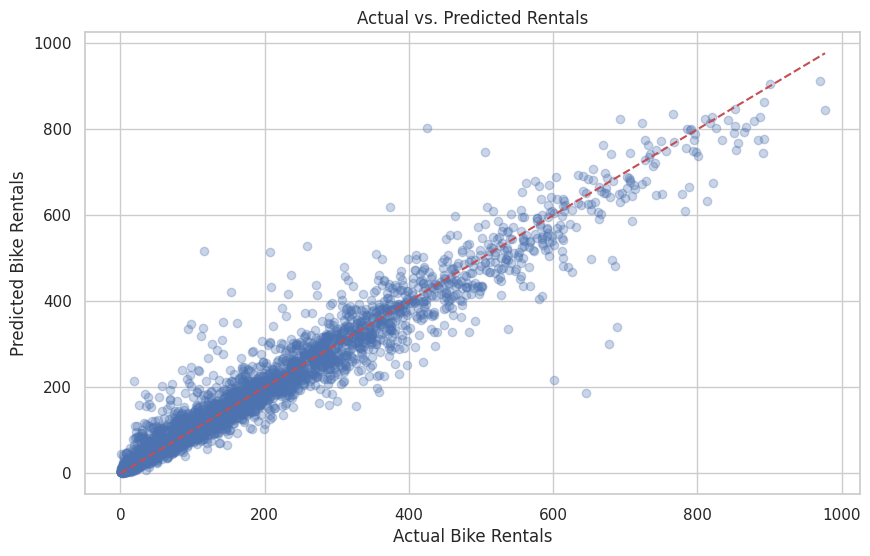

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs. Predicted Rentals')
plt.grid(True)
plt.show()

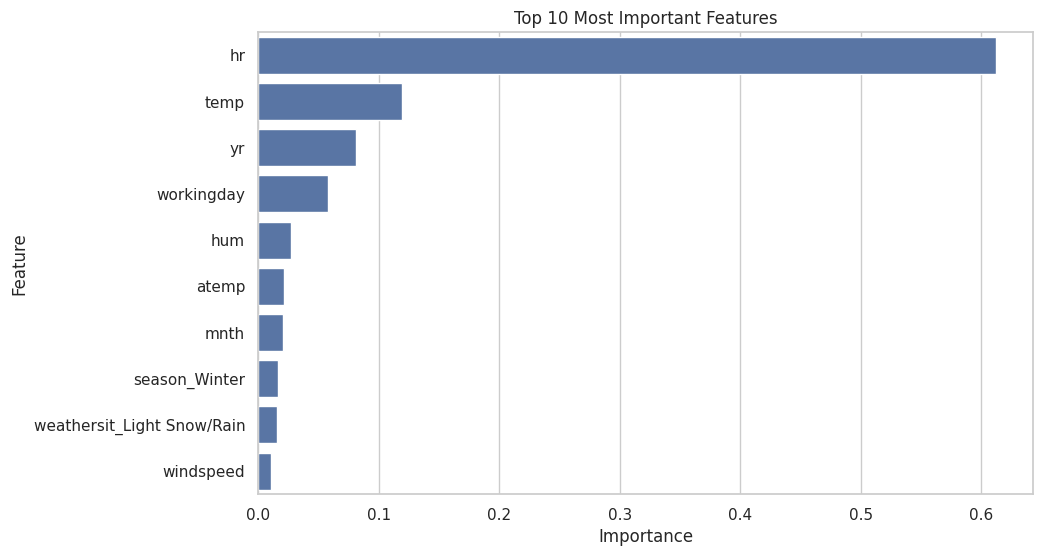

In [ ]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features')
plt.show()

<h1>Summary of the Report</h1>

This study uses the Bike Sharing Dataset from the Machine Learning Repository and applies the whole data science lifecycle. Predicting how many bikes will be rented each hour based on weather, time of day, and calendar related data is the main goal. Bicycle sharing companies, transportation agencies, and city planners can all benefit from accurate bike use estimates by managing inventory, assigning resources effectively, and maximizing rider demand.

Over 17,000 hourly recordings from Washington, D.C., gathered in 2011 and 2012, made up the hour.csv dataset used in this analysis. In addition to time based variables like the hour of the day, day of the week, and season, each row in the dataset records environmental data like temperature, humidity, and windspeed. The total number of bikes hired during that particular hour is represented by the target variable, cnt. I eliminated columns that weren't important during the data wrangling step, such as instant, dteday, casual, and registered. For easier reading, I also changed categories like weather, season, and weekday into descriptive labels. The dataset was verified to be full and prepared for analysis by looking for missing values.

I used Plotly Express to create an interactive dashboard that allowed me to examine data trends. A number of distinct patterns appeared. The biggest was the dramatic rise in rental prices during the morning and evening travel, especially from 8 a.m. to 6 p.m. In line with expectations, usage was also noticeably greater in the summer and fall than in the winter. While bad weather resulted in lower demand, warmer temperatures were positively associated with higher bike rental rates. These observations offered compelling proof that time and weather related variables would be important in bike use modeling.

I decided to use a Random Forest Regressor for the predictive modeling stage since it can manage non-linear interactions and offer a transparent measure of feature importance. Before I started modeling, I divided the data into training and test sets using an 80/20 ratio and applied quick encoding to all categorical features. Using the test set, I analyzed the model's performance after training it on the training data. A root mean squared error (RMSE) of roughly 45.30 and an R2 score of roughly 0.94 were attained by the model. With an average forecast error of about 45 bikes per hour, this shows that the model accounts for 94% of the variability in hourly bike rentals, which is appropriate considering the highest reported values.

I looked at each feature's relative importance in order to further analyze the model. The most significant predictor was the time of day (hr), which was followed by temperature (temp) and adjusted temperature (atemp). These findings make sense because rental activity is directly related to outdoor comfort levels and commute times. Weather conditions, working day status, season, and weekday all had a moderate effect. The impact of windspeed was less significant but still detectable. These results demonstrate that human routines and environmental factors influence rental demand, which makes predictive modeling an extremely useful tool for operational planning.

In conclusion, this research showed the need of using the entire data science lifecycle, from preliminary data cleansing and exploratory analysis to interpretation and predictive modeling. Strong performance and confirmation of previous assumptions on commuter behavior and the influence of weather were provided by the Random Forest model. Future research might involve implementing this model for real time forecasting, adding other elements like holiday events, or testing out more basic models for production applications. This investigation demonstrates how data driven approaches can greatly improve urban transportation networks' decision-making.